# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Display-cash-rates-for-G4" data-toc-modified-id="Display-cash-rates-for-G4-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Display cash rates for G4</a></div><div class="lev1 toc-item"><a href="#Cash-returns" data-toc-modified-id="Cash-returns-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cash returns</a></div>

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

from adagio.utils import keys
from adagio.utils.mongo import get_library

In [2]:
library = get_library(keys.cash_returns)

# Display cash rates for G4

Load historical cash rate for G4 countries.

In [3]:
symbols = library.list_symbols(regex='cash_rate')

In [4]:
cash_rate = pd.concat([library.read(s).data for s in symbols], axis=1)

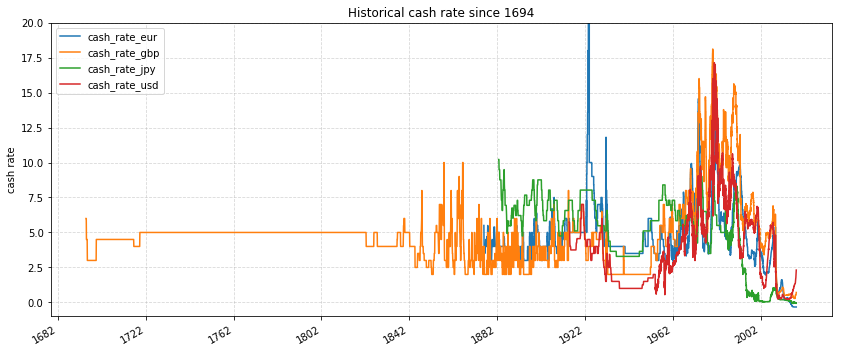

In [5]:
fig, ax = plt.subplots(figsize=(14, 6))
cash_rate.fillna(method="pad").plot(grid=True, ylim=(-1.0, 20), ax=ax)
ax.set_ylabel("cash rate")
ax.set_title("Historical cash rate since 1694");

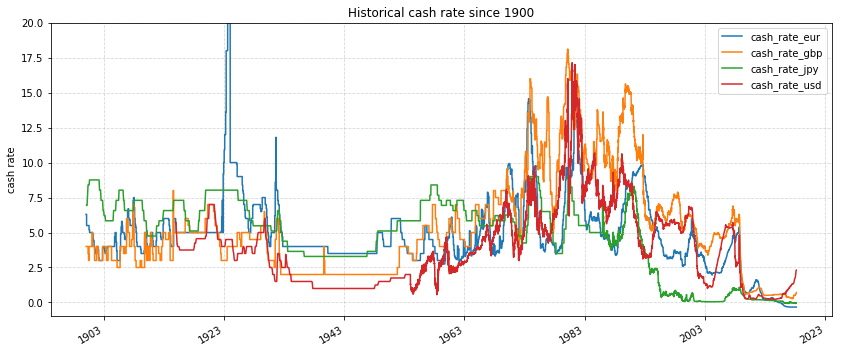

In [6]:
fig, ax = plt.subplots(figsize=(14, 6))
cash_rate['1900':].fillna(method="pad").plot(grid=True, ylim=(-1.0, 20), ax=ax)
ax.set_ylabel("cash rate")
ax.set_title("Historical cash rate since 1900");

# Cash returns

The figure below shows the historical performance of cash assuming that investors can earn cash rate by depositing to the bank.

In [7]:
symbols = library.list_symbols(regex='cash_return')

In [8]:
cash_return = pd.concat([library.read(s).data for s in symbols], axis=1)

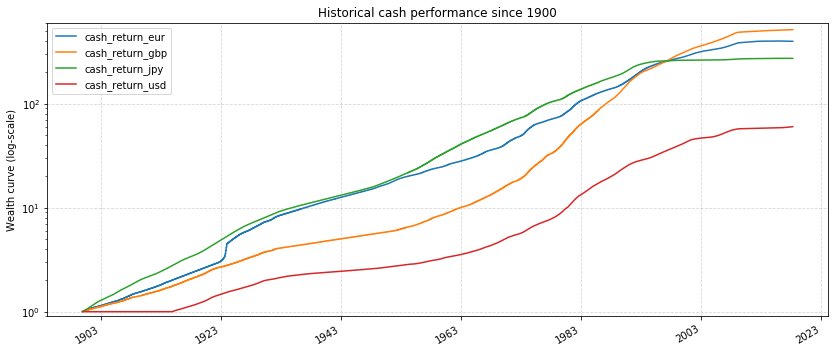

In [9]:
fig, ax = plt.subplots(figsize=(14, 6))
cash_return['1900':].fillna(0).add(1).cumprod().plot(grid=True, ylim=(0.9, 600), logy=True, ax=ax)
ax.set_ylabel("Wealth curve (log-scale)")
ax.set_title("Historical cash performance since 1900");